In [188]:
import pandas as pd
import numpy as np
# from sklearn.
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
data = pd.read_csv('./spotify.csv', na_values=['', ' ', '-'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   released_year         953 non-null    int64  
 2   in_spotify_playlists  953 non-null    int64  
 3   in_spotify_charts     951 non-null    float64
 4   streams               953 non-null    int64  
 5   in_apple_playlists    953 non-null    int64  
 6   in_apple_charts       951 non-null    float64
 7   bpm                   953 non-null    int64  
 8   mode                  953 non-null    object 
 9   energy                953 non-null    int64  
 10  instrumentalness      953 non-null    int64  
 11  liveness              953 non-null    int64  
 12  speechiness           953 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 96.9+ KB
None


In [190]:
data = data[data['in_spotify_charts'].isnull() == False].reset_index(drop=True)
data = data[data['in_apple_charts'].isnull() == False].reset_index(drop=True)

data.drop(columns='track_name', inplace=True)

# data['mode'].unique()
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})

# Because those songs that are not even on apple/spotify charts are marked as 0, it will break clusterization, solution is to assign them the maximum value (worst songs on the list)
# data.loc[data['in_apple_charts'] == 0] = data['in_apple_charts'].max() # WARNING: This will change all rows!
data.loc[data['in_apple_charts'] == 0, 'in_apple_charts'] = data['in_apple_charts'].max()

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released_year         949 non-null    int64  
 1   in_spotify_playlists  949 non-null    int64  
 2   in_spotify_charts     949 non-null    float64
 3   streams               949 non-null    int64  
 4   in_apple_playlists    949 non-null    int64  
 5   in_apple_charts       949 non-null    float64
 6   bpm                   949 non-null    int64  
 7   mode                  949 non-null    int64  
 8   energy                949 non-null    int64  
 9   instrumentalness      949 non-null    int64  
 10  liveness              949 non-null    int64  
 11  speechiness           949 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 89.1 KB


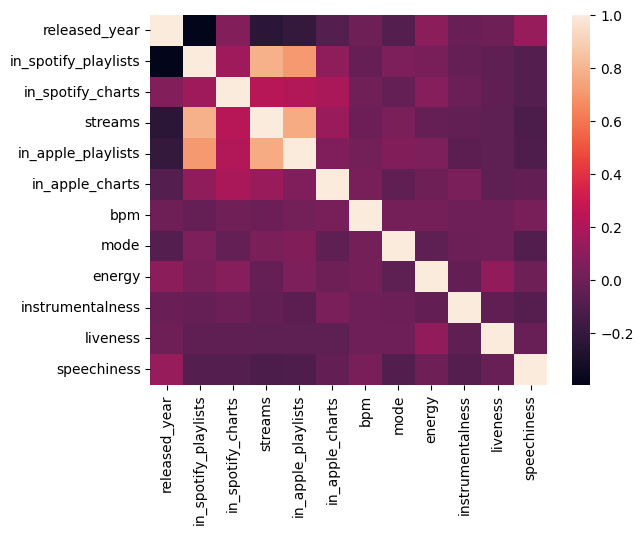

In [192]:
sns.heatmap(data.corr())
plt.show()

In [193]:
# streams, in_apple_playlists i in_spotify_playlists su međusobno jako povezani (ako pesma ima puno streamova, skoro sigurno ima i puno dodavanja na plejlistama).
# Ako sve ostaviš, algoritam će „duplirati“ (ili čak „utrostručiti“) značaj tih varijabli i klasterizacija neće biti fer – grupisaće pesme uglavnom po tome, ignorišući druge osobine.
# Izbacujemo bilo koje dve od te tri
data.drop(columns=['in_apple_playlists', 'in_spotify_playlists'], inplace=True)

In [194]:
def show_boxplot(data):
    plt.boxplot(data)
    plt.show()

In [195]:
from scipy.stats.mstats import winsorize

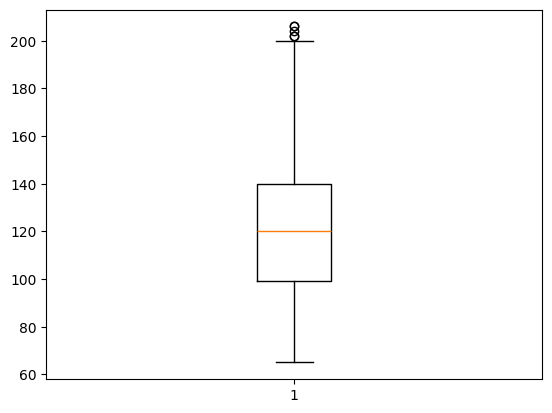

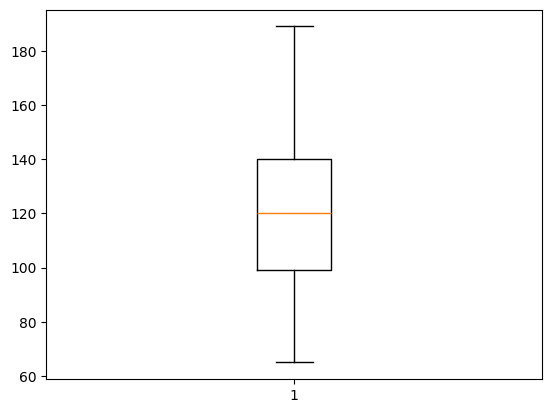

In [196]:
show_boxplot(data['bpm'])

data['bpm'] = winsorize(data['bpm'], limits=[0, 0.01])

# We don't drop bpm, we only drop variables if they contains more then 10% of the outliers
show_boxplot(data['bpm'])

In [197]:
data = data[['in_spotify_charts', 'bpm', 'mode', 'energy', 'liveness']] # Double brackets

In [198]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

print(data.describe())

numpy_array = MinMaxScaler().fit_transform(data)
data = pd.DataFrame(columns=data.columns, data=numpy_array)

print(data.describe())

       in_spotify_charts         bpm        mode      energy    liveness
count         949.000000  949.000000  949.000000  949.000000  949.000000
mean           11.713383  122.246575    0.578504   64.260274   18.221286
std            18.943789   27.675529    0.494059   16.562652   13.727438
min             0.000000   65.000000    0.000000    9.000000    3.000000
25%             0.000000   99.000000    0.000000   53.000000   10.000000
50%             3.000000  120.000000    1.000000   66.000000   12.000000
75%            16.000000  140.000000    1.000000   77.000000   24.000000
max           147.000000  189.000000    1.000000   97.000000   97.000000
       in_spotify_charts         bpm        mode      energy    liveness
count         949.000000  949.000000  949.000000  949.000000  949.000000
mean            0.079683    0.461666    0.578504    0.627958    0.161929
std             0.128869    0.223190    0.494059    0.188212    0.146037
min             0.000000    0.000000    0.000000   

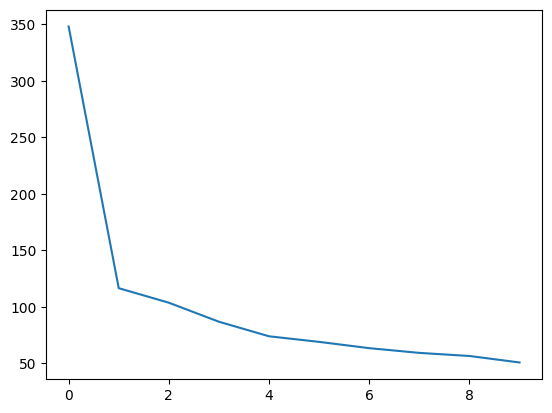

In [199]:
# Elbow
import sklearn.cluster as cluster

wcss = [] # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=i).fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(wcss)
plt.show()

In [200]:
kmeans = cluster.KMeans(n_clusters=2).fit(data)

data['cluster'] = kmeans.labels_

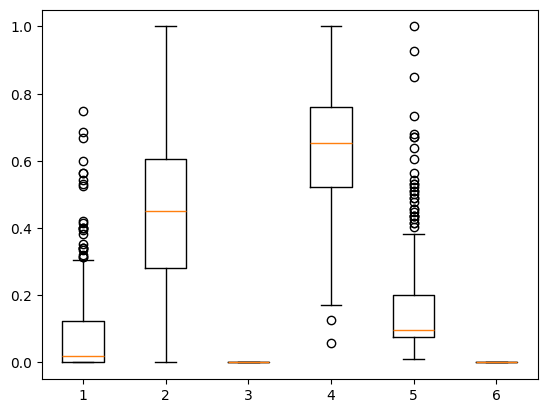

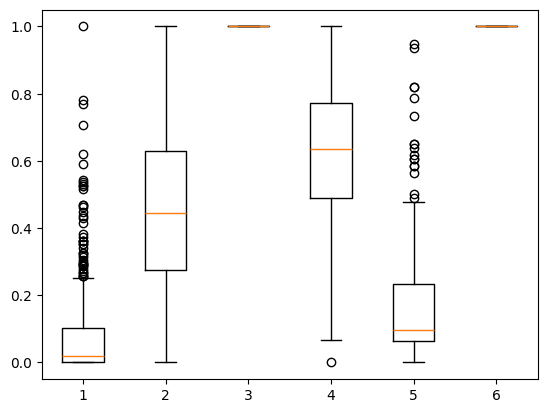

In [208]:
plt.boxplot(data.loc[data['cluster'] == 0])
plt.show()

plt.boxplot(data.loc[data['cluster'] == 1])
plt.show()